In [61]:
#import necessary liabries
import numpy as np
from numpy import array
from numpy import array
from numpy import argmax
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import itertools
import math
import time
import pickle

from matplotlib.legend_handler import HandlerBase
sns.set(style='whitegrid',font_scale=1.5)
%matplotlib inline


import statsmodels.formula.api as sm
import xgboost as xgb
from scipy import stats
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier



import warnings
warnings.filterwarnings('ignore')

In [62]:
soccer_df = pd.read_csv("../Data/soccer-spi/soccer_df.csv",index_col=0)
club_data = pd.read_csv("../Data/soccer-spi/club_data.csv",index_col=0)

In [63]:
soccer_df.head(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
1,2016,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2,2,2.45,0.77,0,ASMonaco
2,2016,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2,1,0.85,2.77,1,Hull City
3,2016,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1,1,0.73,1.11,0,Everton
4,2016,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0,1,1.11,0.68,2,Crystal Palace
5,2016,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1,1,1.40,0.55,0,Middlesbrough
6,2016,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0,1,1.24,1.84,2,Burnley
7,2016,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1,1,1.05,0.22,0,Southampton
8,2016,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,3,2,1.03,1.84,1,Bordeaux
9,2016,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2,1,2.14,1.25,1,Manchester City
10,2016,55.00,54.90,0.4471,0.2490,0.3038,29.2,25.6,0,1,0.30,1.17,2,DijonFCO


In [64]:
soccer_df.tail(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
11884,2021,73.99,54.36,0.6454,0.1410,0.2136,41.2,30.5,4,0,2.20,0.31,1,Borussia Monchengladbach
11885,2021,59.62,80.86,0.1957,0.5770,0.2273,46.8,47.2,4,1,2.99,1.72,1,Watford
11886,2021,65.84,71.28,0.3898,0.3436,0.2666,37.4,14.6,3,3,1.37,1.87,0,Burnley
11887,2021,61.00,69.45,0.3583,0.3789,0.2628,47.5,24.5,3,3,2.51,1.11,0,Newcastle
11888,2021,55.19,69.71,0.2865,0.4382,0.2753,36.1,22.1,2,1,0.53,1.09,1,Norwich City
11889,2021,70.01,76.08,0.3729,0.3578,0.2692,27.7,21.6,2,0,1.05,0.35,1,Aston Villa
11890,2021,71.28,78.51,0.2841,0.4536,0.2623,12.7,59.5,1,0,1.44,0.42,1,Wolverhampton
11891,2021,78.84,62.97,0.6454,0.1172,0.2374,70.4,28.3,2,2,1.46,1.41,0,Sevilla FC
11892,2021,81.85,58.75,0.7338,0.1002,0.1660,44.3,16.8,3,1,1.62,1.25,1,Paris Saint-Germain
11893,2021,69.88,78.62,0.2984,0.4584,0.2432,51.4,73.0,0,2,0.34,2.73,2,Lazio


In [65]:
# values = array(soccer_df['team'])
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [66]:
club_data.head(10)

,rank,prev_rank,name,league,off,def,spi
0,1,1,Bayern Munich,German Bundesliga,3.64,0.51,93.72
1,2,2,Manchester City,Barclays Premier League,2.97,0.24,93.57
2,3,3,Liverpool,Barclays Premier League,3.06,0.46,91.04
3,4,4,Chelsea,Barclays Premier League,2.47,0.24,90.32
5,6,6,Real Madrid,Spanish Primera Division,2.57,0.62,84.21
6,7,8,Internazionale,Italy Serie A,2.59,0.66,83.64
7,8,9,Atletico Madrid,Spanish Primera Division,2.29,0.51,83.19
8,9,10,Barcelona,Spanish Primera Division,2.44,0.62,82.68
9,10,7,RB Leipzig,German Bundesliga,2.53,0.70,82.23
10,11,11,Paris Saint-Germain,French Ligue 1,2.52,0.75,81.16


In [67]:
soccer_df.shape , club_data.shape

((11891, 14), (128, 7))

In [68]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11891 entries, 1 to 11893
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       11891 non-null  int64  
 1   spi1         11891 non-null  float64
 2   spi2         11891 non-null  float64
 3   prob1        11891 non-null  float64
 4   prob2        11891 non-null  float64
 5   probtie      11891 non-null  float64
 6   importance1  11891 non-null  float64
 7   importance2  11891 non-null  float64
 8   score1       11891 non-null  int64  
 9   score2       11891 non-null  int64  
 10  xg1          11891 non-null  float64
 11  xg2          11891 non-null  float64
 12  target       11891 non-null  int64  
 13  team         11891 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 1.4+ MB


In [69]:
soccer = soccer_df.drop('team',axis =1)
soccer.head(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target
1,2016,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2,2,2.45,0.77,0
2,2016,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2,1,0.85,2.77,1
3,2016,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1,1,0.73,1.11,0
4,2016,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0,1,1.11,0.68,2
5,2016,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1,1,1.40,0.55,0
6,2016,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0,1,1.24,1.84,2
7,2016,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1,1,1.05,0.22,0
8,2016,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,3,2,1.03,1.84,1
9,2016,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2,1,2.14,1.25,1
10,2016,55.00,54.90,0.4471,0.2490,0.3038,29.2,25.6,0,1,0.30,1.17,2


In [70]:
#Define X and y
X = soccer.drop('target', axis =1)
y = soccer['target']

# #normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pd.DataFrame(X_scaled)


#holdout set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10,random_state=42)

#training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20,random_state=42)

In [72]:
X_train.shape, X_test.shape , X_val.shape

((8560, 12), (2141, 12), (1190, 12))

In [73]:
y_train.shape , y_test.shape , y_val.shape

((8560,), (2141,), (1190,))

# Baseline Model using Logistic Regression

In [74]:
baseline_model = LogisticRegression(multi_class='multinomial',random_state=42)
baseline_model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [75]:
baseline_model.score(X_train,y_train)

0.5698598130841122

In [76]:
baseline_model.score(X_test,y_test)

0.5567491826249417

In [77]:
y_train_pred = baseline_model.predict(X_train)
# Was our model correct?
residuals = y_train == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     4878
False    3682
Name: target, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.56986
False    0.43014
Name: target, dtype: float64


In [78]:
y_test_pred = baseline_model.predict(X_test)
# Was our model correct?
residuals = y_test == y_test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     1192
False     949
Name: target, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.556749
False    0.443251
Name: target, dtype: float64


Accuracy Score: 0.5567491826249417
              precision    recall  f1-score   support

           0       0.09      0.00      0.00       533
           1       0.58      0.82      0.68       971
           2       0.52      0.61      0.56       637

    accuracy                           0.56      2141
   macro avg       0.40      0.48      0.42      2141
weighted avg       0.44      0.56      0.48      2141



Text(79.5, 0.5, 'Actual Value')

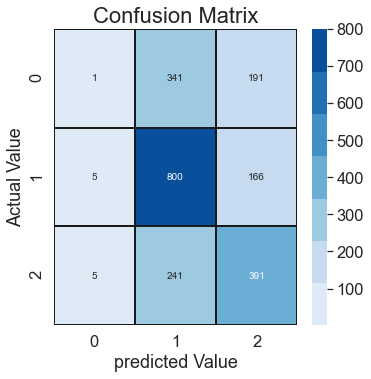

In [99]:
print(f"Accuracy Score: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))

plt.figure(figsize=(12,12))
plt.subplot(221)
ax=sns.heatmap(confusion_matrix(y_test,y_test_pred),
               annot=True,fmt='d',linecolor='k',linewidth=1,cmap =sns.color_palette('Blues',7))
plt.title("Confusion Matrix",fontsize=22)
plt.xlabel("predicted Value")
plt.ylabel("Actual Value")

In [ ]:
def evaluate ()